### Load CIFAR10

In [3]:
from keras.datasets import cifar10

# The data, shuffled and split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print("Max y_train value", y_train.max())
print("Max X_train value", X_train.max())

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Max y_train value 9
Max X_train value 255


### EDA - Display five images

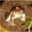

array([6], dtype=uint8)

array([9], dtype=uint8)

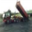

array([9], dtype=uint8)

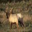

array([4], dtype=uint8)

array([1], dtype=uint8)

In [4]:
from keras.preprocessing.image import array_to_img
from IPython.display import display

# Display first five images and labels
for x, y in zip(X_train[:5], y_train[:5]):
    img = array_to_img(x, data_format = 'channels_last')
    display(img)
    display(y)

### EDA - Check for class imbalance / prevalance

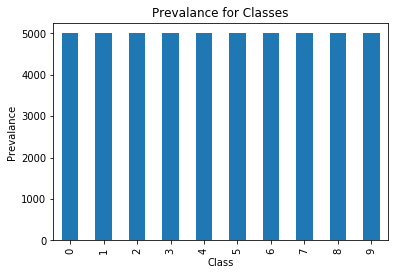

In [5]:
import pandas as pd
%matplotlib inline

s = pd.Series(y_train.flatten())
axes = s.value_counts().sort_index().plot(kind = 'bar')

axes.set_xlabel('Class')
axes.set_ylabel('Prevalance')
axes.set_title('Prevalance for Classes');

### Convert labels to Categorical (One-Hot) Representation

In [6]:
from keras.utils import to_categorical

# Convert class vectors to class matrices.
y_ = to_categorical(y_train)
y1_ = to_categorical(y_test)

### Get data dimensions

In [7]:
# Initialize data dimension variables
nb_train, height, width, channels = X_train.shape
nb_test = X_test.shape[0]
nb_classes = y_train.shape[1]

### Feature Scaling (Normalization)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Vectorized Flatten

In [9]:
X_ = X_train.reshape([nb_train, height * width * channels])
X1_ = X_test.reshape([nb_test, height * width * channels])

In [10]:
# model.add(Dense(64, input_dim=20, init='uniform'))
# model.add(Activation('tanh'))
# model.add(Dropout(0.5))
# model.add(Dense(64, init='uniform'))
# model.add(Activation('tanh'))
# model.add(Dropout(0.5))
# model.add(Dense(10, init='uniform'))
# model.add(Activation('softmax'))

### Keras Model (Sequential API)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=64, 
                activation = 'linear', #'softmax' 
                input_shape=[height * width * channels], 
                bias_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(units=64, 
                activation = 'sigmoid', #'softmax' 
                input_shape=[height * width * channels], 
                bias_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(Dense(units=10, 
                activation = 'softmax', #'softmax' 
                input_shape=[height * width * channels], 
                bias_initializer='glorot_uniform'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                196672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 201,482.0
Trainable params: 201,482.0
Non-trainable params: 0.0
_________________________________________________________________


# Add a Loss

In [12]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy']) # Possibe to implement optimizer , loss of our choice in TF and use in keras

# Evaluate

In [13]:
model.evaluate(X_, y_)

49888/50000 [============================>.] - ETA: 0s

[2.5077567439270019, 0.10392]

# Predictions

In [14]:
import numpy as np

P_ = model.predict(X_)

# Optimization

In [15]:
hist = model.fit(X_, y_, batch_size=300, epochs=30)

Epoch 1/30
50000/50000 [==============================] - 4s - loss: 1.9332 - acc: 0.2999     
Epoch 2/30
50000/50000 [==============================] - 3s - loss: 1.7482 - acc: 0.3781     
Epoch 3/30
50000/50000 [==============================] - 5s - loss: 1.6809 - acc: 0.4018     
Epoch 4/30
50000/50000 [==============================] - 4s - loss: 1.6393 - acc: 0.4173     
Epoch 5/30
50000/50000 [==============================] - 3s - loss: 1.6123 - acc: 0.4255     
Epoch 6/30
50000/50000 [==============================] - 4s - loss: 1.5864 - acc: 0.4348     
Epoch 7/30
50000/50000 [==============================] - 5s - loss: 1.5672 - acc: 0.4444     
Epoch 8/30
50000/50000 [==============================] - 2s - loss: 1.5577 - acc: 0.4447     
Epoch 9/30
50000/50000 [==============================] - 3s - loss: 1.5448 - acc: 0.4508     
Epoch 10/30
50000/50000 [==============================] - 3s - loss: 1.5351 - acc: 0.4535     
Epoch 11/30
50000/50000 [========================

In [ ]:
model.evaluate(X_, y_)

In [ ]:
# P_ = model.predict(X_)
# P_

In [ ]:
model.fit()

In [17]:
hist.history

{'acc': [0.29987999990582465,
  0.3780600007176399,
  0.40181999802589419,
  0.4173399997353554,
  0.42551999992132189,
  0.4348000003695488,
  0.44444000035524367,
  0.44472000133991241,
  0.45078000050783157,
  0.45354000031948088,
  0.45702000057697295,
  0.45891999948024748,
  0.46674000036716462,
  0.46519999915361404,
  0.46760000050067901,
  0.46595999920368192,
  0.46975999957323072,
  0.47030000030994418,
  0.47037999916076662,
  0.47449999845027924,
  0.47715999871492387,
  0.47805999922752379,
  0.48043999963998796,
  0.48137999993562697,
  0.48141999858617784,
  0.48301999819278718,
  0.48283999854326248,
  0.4858199979662895,
  0.48385999631881715,
  0.48685999983549116],
 'loss': [1.9332309589385985,
  1.7481611661911012,
  1.6809335732460022,
  1.6393146471977234,
  1.6122889552116395,
  1.5864472050666809,
  1.5672489314079285,
  1.5576997451782226,
  1.5447716982364654,
  1.5350629065036774,
  1.5251969959735869,
  1.5172074174880981,
  1.5008486771583558,
  1.50100567

In [20]:
a = model.evaluate(X_, y_)

49632/50000 [============================>.] - ETA: 0s

In [21]:
print(a)

[1.3471937642288208, 0.52181999999999995]
